# A6: Integrating Differential Equations

- ***This is a group project*** - see Canvas for your group allocations
- Complete the following and submit to Canvas (once per group) before Oct 31 11:59PM,
- Late work will recieve 0%,
- Each assignment is worth the same, 
- Please get in contact with me in plenty of time if you need help,
- Before submitting your work, make sure to check everything runs as expected. Click **Kernel > Restart Kernel and Run All Cells**.
- Feel free to add more cells to experiment or test your answers,
- The use of GenAI is prohibited as outlined in the course syllabus. If I suspect you of cheating, you may be asked to complete a written or oral exam on the content of this assignment,
- ✍ indicates a question where a mathematical proof is required
- 💻 indicates a question where numerical experiments are required 

<div class="alert alert-info">
Enter your names here: YOUR NAMES HERE  

Approximate time spent on this assignment: .......
</div>

In [35]:
using Plots
using LaTeXStrings
using Polynomials
using PrettyTables

In this assignment, you will apply knowledge that you have gained from the last few weeks to solve initial value problems numerically. These problems are found throughout science and engineering and have a number of important applications. In general, these equations cannot be solved exactly so, in practice, one implements various numerical schemes to obtain an approximate solution. However, it's a good idea to start with a problem where we do have access to the analytical solution so that we can analyse the erorrs in the approximation and get a feel for what is going on! 

<div class='alert alert-block alert-success'><b>Reminder.</b> 

Recall the *Fundamental Theorem of Calculus*: suppose $f : [a,b] \to \mathbb R$ is continuous and define $F(t) := \int_a^t f(s) \mathrm{d}s$. Then, $F$ is differentiable on $(a,b)$ and $F'(t) = f(t)$ for all $t \in (a,b)$.
</div> 

Consider the following differential equation (initial value problem): for a fixed function $f$ and *initial condition* $u_0 \in \mathbb R$, find $u : [0,\infty) \to \mathbb R$ such that 

\begin{align}
    u'(t) &= f\big(t, u(t) \big) \tag{1}\\
    u(0) &= u_0.  \nonumber
\end{align}

We suppose that there exists $T>0$ and a unique continuously differentiable solution $u:[0,T] \to \mathbb R$ to this equation. This is guaranteed if $f$ is continuous and Lipschitz in its second argument (this is Picard's theorem and beyond the scope of this course).

We divide the interval $[0,T]$ into the *mesh points* $t_j = j h$ for $j=0,\dots,n$ where $h = \frac{T}{n}$ is the *step size*. In the following, we will approximate the solution $u$ at mesh points $t_j$. For each $j=0,\dots,n$, we seek $u_j \approx u(t_j)$ (notice that the approximation is exact for $j=0$). 

1. ✍ Use the Fundamental Theorem of Calculus, to show: for all $j=0,\dots,n-1$

\begin{align}
    u(t_{j+1}) - u(t_j) = \int_{t_j}^{t_{j+1}} f\big(s, u(s) \big) \mathrm{d}s. \tag{2}
\end{align}

2. ✍ Use the Rectangular rule on $[t_j, t_{j+1}]$ to derive *Euler's method*:

\begin{align}
    u_{j+1} = u_j + h f( t_j, u_j ), \qquad j = 0,\dots, n-1 \tag{3}
\end{align}

Sometimes this method is known as the *Explicit* Euler method because $u_{j+1}$ is given explicitly as a function of $u_j$. 

3. ✍ Verify that the following initial value problem

\begin{align}
    u'(t) &= - u(t)^2 \cos t \tag{4}\\
    u(0) &= u_0 \nonumber
\end{align}

has a solution $u(t) = \frac{u_0}{ 1 + u_0 \sin t }$. For which initial conditions $u_0$ does the solution $u$ exist for all time $t\geq0$? For which initial conditions does the solution blow up in finite time?

Here, we define ``u_exact`` to be the solution of $(4)$. In the following, we will try and approximate this function by solving $(4)$ numerically.

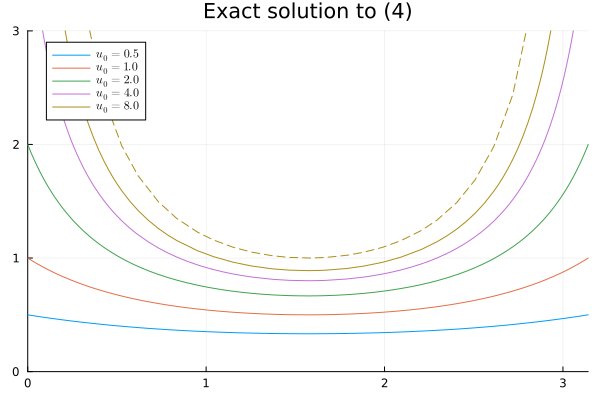

In [36]:
u_exact( t, u0=1. ) =  u0/( 1 + u0 * sin(t) ) 
plot( t-> u_exact(t, 0.5), xlims=(0, π), ylims=(0,3), 
    title="Exact solution to (4)", label=L"u_0 = 0.5" )
plot!( t-> u_exact(t, 1.0), label=L"u_0 = 1.0" )
plot!( t-> u_exact(t, 2.0), label=L"u_0 = 2.0" )
plot!( t-> u_exact(t, 4.0), label=L"u_0 = 4.0" )
plot!( t-> u_exact(t, 8.0), label=L"u_0 = 8.0" )
plot!( t-> 1/sin(t), linestyle=:dash, primary=false )

4. 💻 Fix $u_0 = 1$ and solve $(4)$ numerically using Euler's method. You may choose $T = 2$.

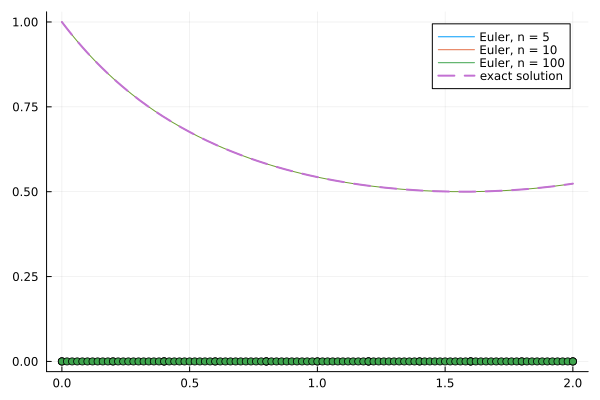

In [43]:
function Euler( u0, g, T, n )
    u = zeros(n+1)
    # Your code here
    # In Julia, arrays start at 1 so we want u[j] ≈ u( t_{j-1} ) for j = 1,...,n+1

   
    





    return u
end 

# You can leave this - it should plot the exact solution and the approximation using Euler's method

u0, T = 1., 2.
g(t, u) = - u^2 * cos(t)

plot( u_exact, 0, T, primary=false)

for n ∈ [5, 10, 100]
    u = Euler( u0, g, T, n )
    plot!( 0:(T/n):T, u, label = "Euler, n = $n" )
    scatter!( 0:(T/n):T, u, primary = false )
end 

plot!( u_exact, 0, T, lw=2, linestyle=:dash, label = "exact solution")


5. 💻 Plot the errors $e_n := \max_{j = 0,\dots,n} \big| u(t_j) - u_j \big|$ as a function of $n$. What is the rate of convergence?

In [38]:
N = 500
errs = zeros(N)
for n ∈ 1:N
    u = Euler( u0, g, T, n )
    u_exact_grid = @. u_exact( 0:(T/n):T )
    errs[n] = maximum( @. abs( u - u_exact_grid ) )
end

# Your code here
# Plot the errors errs[n]

    


Another approximation uses the Trapezoid rule on $[t_j, t_{j+1}]$: 

\begin{align}
    u_{j+1} = u_j + \frac{h}{2} \Big[ f\big( t_j, u_j \big) + f\big( t_{j+1}, u_{j+1} \big) \Big] \tag{5}
\end{align}

This is an implicit method because $u_{j+1}$ is given as a function of $u_{j+1}$ (i.e. we only have an implicit equation for $u_{j+1}$). Therefore, if we are to implement this equation, we need to be able to solve the fixed point problem $(5)$ for $u_{j+1}$.

6. ✍ Consider again the example $(4)$ where $f(t,u) = -u^2 \cos t$. Show that $(5)$ is equivalent to solving $\Phi( u_{j+1} ) = 0$ where

\begin{align}
    \Phi( v ) := \tfrac{h}{2} \cos( t_{j+1} ) v^2 + v + \left( \tfrac{h}{2} \cos( t_{j} ) u_j - 1 \right) u_j \tag{6}
\end{align}

7. ✍ Explain why, for all $h$ sufficiently small, Newton's iteration applied to $\Phi$ starting at $v_1 := u_j + h (u_j)^2 \cos( t_j )$ converges quadratically to some $u_{j+1}$ satisfying $\Phi( u_{j+1} ) = 0$.

6. 💻 Implement $(5)$ to approximate the solution to $(4)$. You may use the provided ``Newton`` function. 

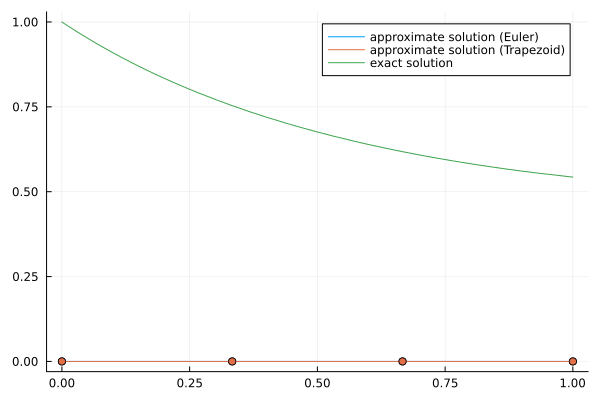

In [ ]:
function Newton( f, f_prime, x1; N=100, tol=1e-10)
    # Solves f(ξ) = 0 using Newton's method 
    for n in 2:N
        x1 = x1 - f(x1)/f_prime(x1) 
        r = abs(f(x1));
        if (r < tol)
            return x1
        end
    end
    @warn "max interations |f| = $r";
    return x1
end

function Trapezoid( u0, g, du_g, T, n )
    u = zeros(n+1)
    
    # Your code here



    

    return u
end 

# You can leave the following as is 

u0, T, n = 1., 1., 3
g(t, u) = - u^2 * cos(t)
du_g(t, u) = -2*u * cos(t)

t = 0:(T/n):T
u = Euler( u0, g, T, n )
u2 = Trapezoid( u0, g, du_g, T, n )

plot( t, u, label = "approximate solution (Euler)" )
scatter!( t, u, primary = false )

plot!( t, u2, label = "approximate solution (Trapezoid)" )
scatter!( t, u2, primary = false )

plot!( u_exact, 0, 1, label = "exact solution" )

9. 💻 Plot the errors $e_n := \max_{j = 0,\dots,n} \big| u(t_j) - u_j \big|$ as a function of $n$. What is the rate of convergence?

In [44]:
N = 500
errs2 = zeros(N)
for n ∈ 1:N
    u = Trapezoid( u0, g, du_g, T, n )
    u_exact_grid = @. u_exact( 0:(T/n):T )
    errs2[n] = maximum( @. abs( u - u_exact_grid ) )
end

# Your code here



10. ✍ Find an initial value problem in the literature. What does it model/describe? 